In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
l_start = 0
r_end = 2*np.pi*1.5
# r_end = 10
step_base = 0.1
h = 0
step_ravnomern = 1

In [3]:
def func(x:np.array,h:float=h):
    return (np.exp(-x)*np.sin(x))

In [4]:
x_base: np.array = np.arange(start=l_start,stop=r_end,step=step_base)
y_base = func(x_base)

In [5]:
x1 = np.arange(start=l_start,stop=r_end,step = step_ravnomern)
y1 = func(x1)

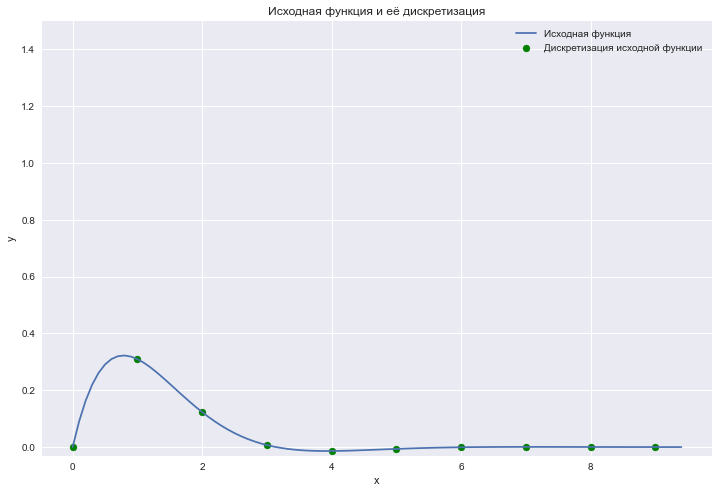

In [6]:
plt.figure(figsize=(12,8))
plt.plot(x_base,y_base,'-',marker='',markersize=6,label='Исходная функция')
plt.scatter(x1,y1,c='g',label='Дискретизация исходной функции')
plt.legend(loc='upper right')
plt.ylim(top = 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Исходная функция и её дискретизация')
plt.show()

In [7]:
n = shape = x1.shape[0]
A = np.zeros(shape=shape)
B = np.zeros(shape=shape)
C = np.zeros(shape=shape)
F = np.zeros(shape=shape)
alpha = np.zeros(shape=shape)
beta = np.zeros(shape=shape)
a = np.zeros(shape=shape)
b = np.zeros(shape=shape)
c = np.zeros(shape=shape-1)

In [8]:
d = x1[1] - x1[0]
B[0], C[0] = 1, 1
A[1:-1], B[1:-1], C[1:-1] = 1, 4, 1
A[-1], B[-1] = 1, 1
F[0] = 2/d * (y1[1] - y1[0])
F[1:n-1] = 3/d * (y1[2:n]-y1[0:n-2])
F[n-1] = 2/d * (y1[n-1] - y1[n-2])

In [9]:
alpha[1] = -C[0] / B[0]
beta [1] = F[0]/B[0]
for i in range(2,n):
    alpha[i] = -C[i-1]/B[i-1] * 1/(1+A[i-1]/B[i-1]*alpha[i-1])
    beta[i] = (F[i-1]-A[i-1]*beta[i-1])/(A[i-1]*alpha[i-1]+B[i-1])

In [10]:
a[n-1] = (F[-1]-A[-1]*beta[-1])/(A[-1]*alpha[n-1]+B[-1]) #Find a[n-1]
for i in range(n-2,-1,-1):
    a[i] = alpha[i+1] * a[i+1] +beta[i+1]

#Верный вариант:
# b[0]=2/d**2 *(3*y1[1]-3*y1[0]-2*a[0]*d-a[1]*d)
# b[1:n] = 2/d**2 * (-3*y1[1:n] + 3*y1[0:n-1] + 2*d*a[1:n] + d*a[0:n-1])
b[0]=2*(3*y1[1]-3*y1[0]-2*a[0]*d-a[1]*d)/(d**2)
for i in range(1,n):
    b[i]=2*(2*a[i]*d-3*y1[i]+3*y1[i-1]+a[i-1]*d)/(d**2)
for i in range (0,n-1):
    c[i]=6*(a[i+1]*d+a[i]*d-2*y1[i+1]+2*y1[i])/(d**3)
# c[:n-1] =6/d**3 * (-2*y1[1:n] + 2*y1[0:n-1] + a[:n-1]*d + a[1:n]*d )
# c[n-1] = 0
# c[0] = 0
# c[0]=c[1]
# b[0]-=b[1]

In [11]:
l = 1
N_inter = 100
y_res = np.zeros(N_inter*(n-l))
x_res = np.zeros(N_inter*(n-l))
f1 = np.zeros(N_inter*(n-l))
f2 = np.zeros(N_inter*(n-l))

In [12]:
# c[2] = 0
# c[alpha.shape[0]-1] = 0
dx = np.linspace(start=0,stop=d,num=N_inter)
for k in range(n-l):
    yk = y1[k] + a[k]*dx + b[k] * (dx**2)/2 + (c[k]*dx**3)/6
    y_res[k*N_inter:N_inter*(k+1)] = yk
    x_res[k*N_inter:N_inter*(k+1)] = dx + x1[k]
    f1d = a[k] + b[k]*dx + c[k]* dx**2/2
    f1[k*N_inter:N_inter*(k+1)] = f1d
    f2d = b[k] + c[k] * dx
    f2[k*N_inter:N_inter*(k+1)] = f2d
    # plt.plot(dx+x1[k],yk)

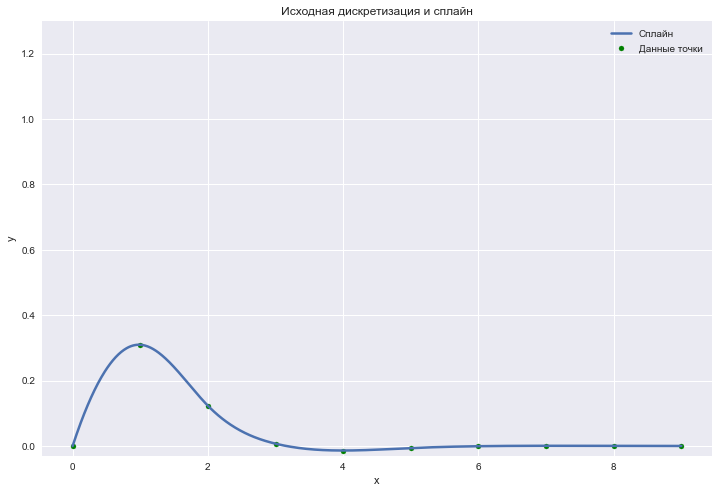

In [13]:
plt.figure(figsize=(12,8))
plt.plot(x_res,y_res,'-',linewidth=2.5,label='Сплайн')
plt.scatter(x1,y1,marker='o',s=25,c='g',label='Данные точки')
# plt.scatter(x_base,y_base,marker='.',s=140,c='r')
plt.legend(fontsize = 10)
plt.ylim(top=1.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Исходная дискретизация и сплайн')
plt.show()

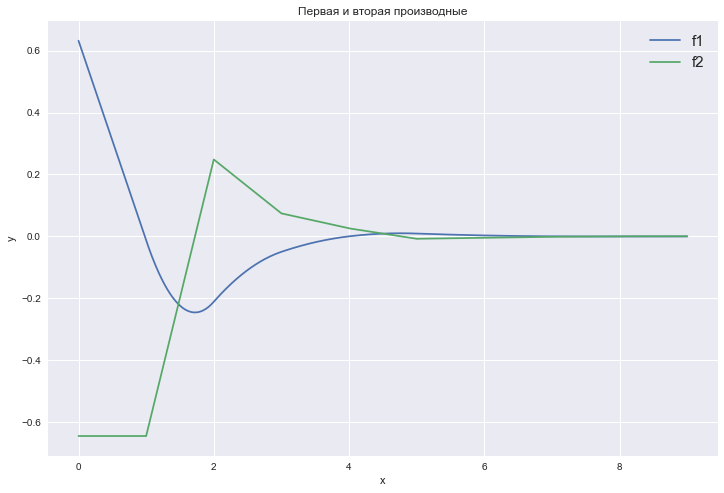

In [14]:
plt.figure(figsize=(12,8))
plt.plot(x_res,f1,label='f1')
plt.plot(x_res,f2,label='f2')
# plt.vlines(x_res[N_inter-1],-1.4,1.4,colors='r',linestyles='--')
plt.legend(fontsize = 15)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Первая и вторая производные')
plt.show()

In [15]:
A[-1]

1.0

In [16]:
A[n-1]

1.0